In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import mode

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 
%matplotlib inline

In [4]:
df = pd.read_csv("Training.csv")

In [5]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [6]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [7]:
df = df.dropna(axis = 1)

In [8]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [9]:
df.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [10]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
itching,4920.0,0.137805,0.344730,0.0,0.0,0.0,0.0,1.0
skin_rash,4920.0,0.159756,0.366417,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,4920.0,0.045122,0.207593,0.0,0.0,0.0,0.0,1.0
shivering,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
small_dents_in_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
inflammatory_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
blister,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0


In [13]:
df['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

Hence, it is a balanced dataset.

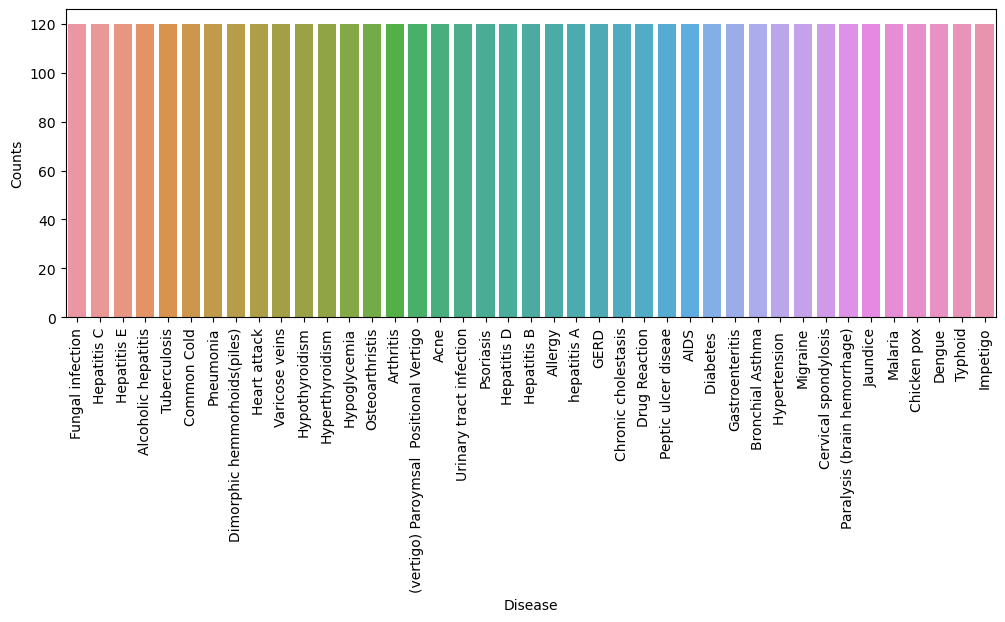

In [14]:
## Plotting the disease count
plt.show()
Count_Of_Disease = df['prognosis'].value_counts()
df1 = pd.DataFrame({"Disease":Count_Of_Disease.index,
                   "Counts": Count_Of_Disease.values})
plt.figure(figsize=(12,4))
sns.barplot(x="Disease", y = "Counts", data = df1)
plt.xticks(rotation=90)
plt.show()

In [15]:
# Splitting the data into training and testing 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
# Encoding the target value
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 24)

# Model Building

In [18]:
svm_model = SVC()


In [19]:
# Cross-validation using KFold 
kf = KFold(n_splits=5, shuffle=True, random_state=24)

# Perform cross-validation and evaluate the model
cross_val_results = cross_val_score(svm_model, X_train, y_train, cv=kf, scoring='accuracy')

In [20]:
svm_model.fit(X_train, y_train)

SVC()

In [21]:
y_pred = svm_model.predict(X_test)

In [22]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [23]:
print("Classification Report", classification_report(y_test,y_pred))

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        17
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        23
     

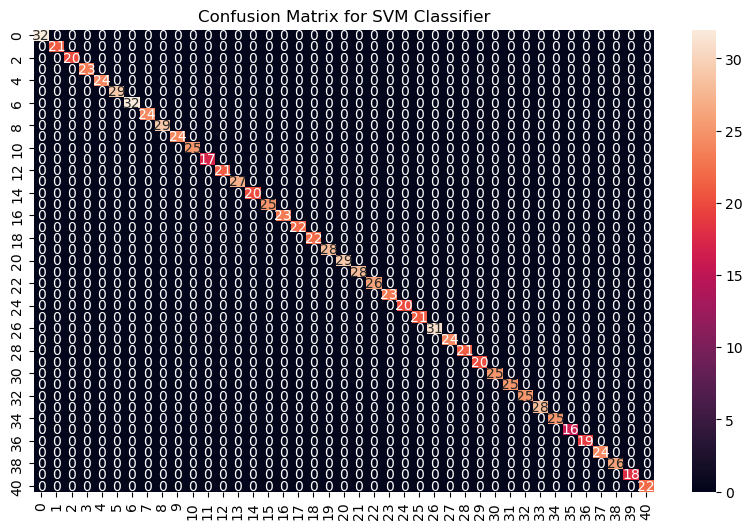

In [24]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

## Creating a function that can take symptoms as input and generate predictions for disease 

In [30]:
symptoms = X.columns.values

In [31]:
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index


In [32]:
data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

In [33]:
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    input_data = np.array(input_data).reshape(1, -1)
    svm_prediction = data_dict["predictions_classes"][svm_model.predict(input_data)[0]]

    predictions = {
        "svm_model_prediction": svm_prediction,
    }
    return predictions

In [34]:
predictDisease("Itching,Skin Rash,Nodal Skin Eruptions")

C:\Users\ASUS\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


{'svm_model_prediction': 'Fungal infection'}